In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Datasets/DigitRecognizer_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Datasets/DigitRecognizer_test.csv')
train_df
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_df['label'].value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


In [ ]:
i = 0
tmp_img = train_df.iloc[i, 1:]
tmp_img.head()

,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0


In [ ]:
tmp_img = tmp_img.values
tmp_img

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
tmp_img = tmp_img.reshape(28,28)
tmp_img
tmp_img.shape

(28, 28)

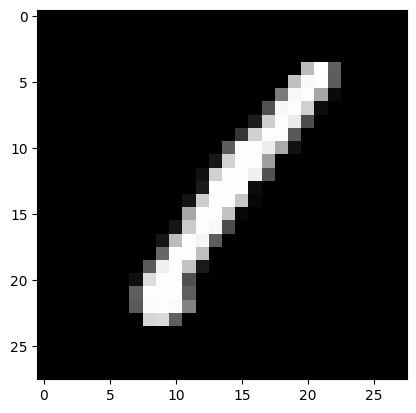

In [ ]:
plt.imshow(tmp_img, cmap='gray')
plt.show()

In [ ]:
col_X = train_df.columns.values[1:].tolist()
col_X[:5]
col_X[-5:]

['pixel779', 'pixel780', 'pixel781', 'pixel782', 'pixel783']

In [ ]:
col_Y = 'label'
col_Y

'label'

In [ ]:
traintest_df = pd.concat([train_df, test_df])
traintest_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
traintest_df = traintest_df.reset_index(drop=True)
traintest_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
traintest_df['id'] = np.arange(len(traintest_df))
traintest_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,id
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,69995
69996,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,69996
69997,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,69997
69998,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,69998


In [ ]:
traintest_df = traintest_df[['id', col_Y] + col_X]
traintest_df

,id,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,69996,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,69997,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,69998,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
traintest_df.loc[:,col_X] = traintest_df.loc[:,col_X].values/255

In [ ]:
train_df = traintest_df.iloc[:len(train_df)]
train_df.loc[:,col_Y] = train_df[col_Y].values.astype(int)
train_df

,id,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,1.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,1,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,2,1.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,3,4.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
4,4,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,41995,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
41996,41996,1.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
41997,41997,7.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
41998,41998,6.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [ ]:
test_df = traintest_df.iloc[len(train_df):].reset_index(drop=True)
test_df

,id,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,42000,NaN,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,42001,NaN,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,42002,NaN,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,42003,NaN,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
4,42004,NaN,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,69995,NaN,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
27996,69996,NaN,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
27997,69997,NaN,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
27998,69998,NaN,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [ ]:
folds = list(StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
             .split(X=train_df[col_X], y=train_df[col_Y]))

In [ ]:
folds[0][0]
folds[0][0].shape
folds[0][1]
folds[0][1].shape
folds[1][0]
folds[1][0].shape
folds[1][1]
folds[1][1].shape

(8400,)

In [ ]:
Y_pred = np.zeros([len(train_df)])
for (train_index, valid_index) in folds:
    X_train = train_df[col_X].values[train_index]
    X_valid = train_df[col_X].values[valid_index]
    Y_train = train_df[col_Y].values[train_index]
    Y_valid = train_df[col_Y].values[valid_index]
    model = RandomForestClassifier(n_estimators=500)
    model.fit(X_train, Y_train)
    Y_pred[valid_index] = model.predict(X_valid)
    Y_pred

In [ ]:
acc = (train_df[col_Y]==Y_pred).mean()
acc

np.float64(0.9660952380952381)

In [ ]:
test_X = test_df.iloc[:,2:]
test_X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [ ]:
test_pred = model.predict(test_X)
test_pred

array([2., 0., 9., ..., 3., 9., 2.])

In [ ]:
sub = pd.read_csv('/content/drive/MyDrive/Datasets/DigitRecognizer_submission.csv')
sub

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [ ]:
sub["Label"] = test_pred
sub

,ImageId,Label
0,1,2.0
1,2,0.0
2,3,9.0
3,4,9.0
4,5,3.0
...,...,...
27995,27996,9.0
27996,27997,7.0
27997,27998,3.0
27998,27999,9.0


In [ ]:
sub.to_csv("submission.csv", index=False)